In [14]:
!pip install emoji
!pip install catboost
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.5 MB/s 


In [25]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import nltk
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re 

from nltk.tokenize import sent_tokenize, word_tokenize

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import backend as K
import tensorflow_addons as tfa

from  sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import emoji

from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import RandomForestClassifier

import lightgbm
import catboost
import xgboost

import tensorflow as tf

In [3]:
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [4]:
df = pd.read_csv('/content/airline_sentiment_analysis.csv').drop(columns='Unnamed: 0')

In [5]:
df

,airline_sentiment,text
0,positive,@VirginAmerica plus you've added commercials t...
1,negative,@VirginAmerica it's really aggressive to blast...
2,negative,@VirginAmerica and it's a really big bad thing...
3,negative,@VirginAmerica seriously would pay $30 a fligh...
4,positive,"@VirginAmerica yes, nearly every time I fly VX..."
...,...,...
11536,negative,@AmericanAir my flight was Cancelled Flightled...
11537,negative,@AmericanAir right on cue with the delays👌
11538,positive,@AmericanAir thank you we got on a different f...
11539,negative,@AmericanAir leaving over 20 minutes Late Flig...


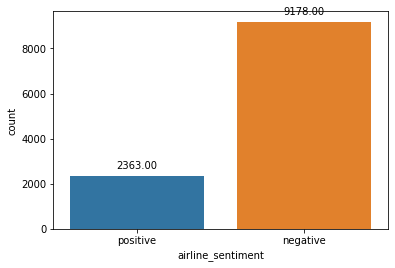

In [6]:
ax = sns.countplot(data=df, x='airline_sentiment')
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

In [ ]:
def tweet_preprocess(tweet, stemmer, is_lemma=False):
    new_tweet = tweet.lower()
    new_tweet = re.sub(r'@\w+', '', new_tweet)
    new_tweet = re.sub(r'#', '', new_tweet)
    new_tweet = re.sub(r':', ' ', emoji.demojize(new_tweet))
    new_tweet = re.sub(r'http\S+','', new_tweet)
    new_tweet = re.sub(r'\$\S+', 'dollar', new_tweet) # Change dollar amounts to dollar
    new_tweet = re.sub(r'[^a-z0-9\s]', '', new_tweet) # Remove punctuation
    new_tweet = re.sub(r'[0-9]+', 'number', new_tweet) # Change number values to number
    new_tweet = new_tweet.split(" ")
    if is_lemma:
      new_tweet =  list(map(lambda x: stemmer.lemmatize(x), new_tweet))
    else:
      new_tweet =  list(map(lambda x: stemmer.stem(x), new_tweet))
    new_tweet =  list(map(lambda x: x.strip(), new_tweet))
    if '' in new_tweet:
        new_tweet.remove('')
     
    return ''.join(new_tweet)

In [ ]:
lemma = WordNetLemmatizer()
ps = PorterStemmer()
tweets_lem = df['text'].apply(lambda x: tweet_preprocess(x, lemma, is_lemma = True))
tweets_stem = df['text'].apply(lambda x: tweet_preprocess(x, ps))

In [ ]:
cv = CountVectorizer()
tweets_lem_count = cv.fit_transform(tweets_lem)

le = LabelEncoder()
labels = le.fit_transform(df['airline_sentiment'])
X_train, X_test, y_train, y_test = train_test_split(tweets_lem_count, labels, test_size = 0.2, stratify = labels, random_state=0)

In [ ]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
nb.score(X_test, y_test)

0.8059766132524903

In [ ]:
nb.score(X_train, y_train)

0.8109835355285961

In [ ]:
cv = CountVectorizer()
tweets_stem_count = cv.fit_transform(tweets_stem)

le = LabelEncoder()
labels = le.fit_transform(df['airline_sentiment'])
X_train, X_test, y_train, y_test = train_test_split(tweets_stem_count, labels, test_size = 0.2, stratify = labels, random_state=0)

In [ ]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
nb.score(X_test, y_test)

0.8059766132524903

In [ ]:
nb.score(X_train, y_train)

0.8109835355285961

In [ ]:
y_pred = nb.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
le.classes_

array(['negative', 'positive'], dtype=object)

- Naive Bayes Classifier is predicting all values as negative due to class imbalance problem so this is not a appropriate model to proceed with

In [ ]:
tfidf = TfidfVectorizer()
tweets_stem_count = tfidf.fit_transform(tweets_stem)
X_train, X_test, y_train, y_test = train_test_split(tweets_stem_count, labels, test_size = 0.2, stratify = labels, random_state=0)

rf = RandomForestClassifier(n_estimators = 50)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
rf.score(X_train, y_train)

0.9919844020797227

In [ ]:
rf.score(X_test, y_test)

0.8098744045041143

In [ ]:
rf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

- In random forest model we see that there is a clear overfitting problem
- During time of validation it is predicting all tweets as negative.

In [ ]:
lgbm = lightgbm.LGBMClassifier()
lgbm.fit(X_train, y_train)
lgbm.score(X_train, y_train)

0.8042677642980935

In [ ]:
lgbm.score(X_test, y_test)

0.8033780857514076

In [ ]:
lgbm.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
xgb = xgboost.XGBClassifier()
xgb.fit(X_train, y_train)
xgb.score(X_train, y_train)

0.8048093587521664

In [ ]:
xgb.score(X_test, y_test)

0.8042442615851018

In [7]:
ps = PorterStemmer()

def process_tweet(tweet):
    new_tweet = tweet.lower()
    new_tweet = re.sub(r'@\w+', '', new_tweet)
    new_tweet = re.sub(r'#', '', new_tweet)
    new_tweet = re.sub(r':', ' ', emoji.demojize(new_tweet))
    new_tweet = re.sub(r'http\S+','', new_tweet)
    new_tweet = re.sub(r'\$\S+', 'dollar', new_tweet) # Change dollar amounts to dollar
    new_tweet = re.sub(r'[^a-z0-9\s]', '', new_tweet) # Remove punctuation
    new_tweet = re.sub(r'[0-9]+', 'number', new_tweet) # Change number values to number
    new_tweet = new_tweet.split(" ")
    new_tweet =  list(map(lambda x: ps.stem(x), new_tweet))
    new_tweet =  list(map(lambda x: x.strip(), new_tweet))
    if '' in new_tweet:
        new_tweet.remove('')
     
    return new_tweet

In [32]:
tweets = df['text'].apply(process_tweet)
le = LabelEncoder()
labels = le.fit_transform(np.array(df['airline_sentiment']))

In [33]:
vocabulary = set()

for tweet in tweets:
    for word in tweet:
        if word not in vocabulary:
            vocabulary.add(word)

vocab_length = len(vocabulary)

# Get max length of a sequence
max_seq_length = 0

for tweet in tweets:
    if len(tweet) > max_seq_length:
        max_seq_length = len(tweet)

# Print results
print("Vocab length:", vocab_length)
print("Max sequence length:", max_seq_length)

Vocab length: 9509
Max sequence length: 90


In [34]:
tokenizer = Tokenizer(num_words = vocab_length)
tokenizer.fit_on_texts(tweets)

sequences = tokenizer.texts_to_sequences(tweets)

word_index = tokenizer.word_index

model_inputs = pad_sequences(sequences, maxlen=max_seq_length, padding='post')

In [35]:
X_train, X_test, y_train, y_test  = train_test_split(model_inputs, labels, train_size=0.7, random_state = 22)

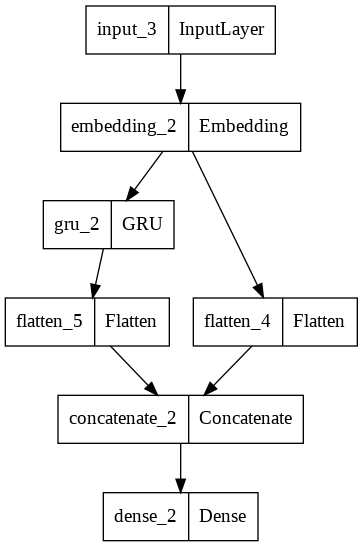

In [36]:
embedding_dim = 32


inputs = tf.keras.Input(shape=(max_seq_length))

embedding = tf.keras.layers.Embedding(input_dim=vocab_length, output_dim = embedding_dim, input_length = max_seq_length)(inputs)

#Model A flatten layer
flatten  = tf.keras.layers.Flatten()(embedding)
#Model B with GRUa and flatten layer
gru = tf.keras.layers.GRU(units = embedding_dim)(embedding)
gru_flatten = tf.keras.layers.Flatten()(gru)


# Both A and B are fed into the output
concat = tf.keras.layers.concatenate([flatten, gru_flatten])

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(concat)


model = tf.keras.Model(inputs, outputs)

tf.keras.utils.plot_model(model)

In [37]:
def focal_loss_custom(alpha, gamma):
   def binary_focal_loss(y_true, y_pred):
      fl = tfa.losses.SigmoidFocalCrossEntropy(alpha=alpha, gamma=gamma)
      y_true_K = K.ones_like(y_true)
      focal_loss = fl(y_true, y_pred)
      return focal_loss
   return binary_focal_loss

In [42]:
model.compile(optimizer='adam',
             loss = focal_loss_custom(alpha=0.1, gamma=1.0),
             metrics = ['accuracy'])

In [43]:
batch_size = 32
epochs = 100

history = model.fit(X_train, y_train, validation_split = 0.2, epochs=epochs,
                   batch_size = batch_size,
                   callbacks=[tf.keras.callbacks.EarlyStopping(
                   monitor = 'val_loss',
                   patience = 3,
                   restore_best_weights = True,
                   verbose = 1),
                   tf.keras.callbacks.ReduceLROnPlateau()])

Epoch 1/100
202/202 [==============================] - 15s 54ms/step - loss: 0.0090 - accuracy: 0.9468 - val_loss: 0.0224 - val_accuracy: 0.8911 - lr: 0.0010
Epoch 2/100
202/202 [==============================] - 10s 50ms/step - loss: 0.0054 - accuracy: 0.9723 - val_loss: 0.0234 - val_accuracy: 0.9004 - lr: 0.0010
Epoch 3/100
202/202 [==============================] - 10s 50ms/step - loss: 0.0035 - accuracy: 0.9847 - val_loss: 0.0252 - val_accuracy: 0.9078 - lr: 0.0010
Epoch 4/100
202/202 [==============================] - 10s 50ms/step - loss: 0.0023 - accuracy: 0.9910 - val_loss: 0.0252 - val_accuracy: 0.9010 - lr: 0.0010
Epoch 4: early stopping


In [31]:
X_train

array([[  56, 1257,   11, ...,    0,    0,    0],
       [   2,   75,   49, ...,    0,    0,    0],
       [   2,    2,   38, ...,    0,    0,    0],
       ...,
       [   4,  118,  341, ...,    0,    0,    0],
       [  55,  477,  186, ...,    0,    0,    0],
       [1199,   93,   32, ...,    0,    0,    0]], dtype=int32)

In [40]:
model.evaluate(X_test,y_test)

109/109 [==============================] - 2s 14ms/step - loss: 0.0212 - accuracy: 0.9050


[0.021170808002352715, 0.9049956798553467]

In [44]:
model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

history = model.fit(X_train, y_train, validation_split = 0.2, epochs=epochs,
                   batch_size = batch_size,
                   callbacks=[tf.keras.callbacks.EarlyStopping(
                   monitor = 'val_loss',
                   patience = 3,
                   restore_best_weights = True,
                   verbose = 1),
                   tf.keras.callbacks.ReduceLROnPlateau()])

Epoch 1/100
202/202 [==============================] - 17s 56ms/step - loss: 0.0804 - accuracy: 0.9841 - val_loss: 0.1922 - val_accuracy: 0.9245 - lr: 0.0010
Epoch 2/100
202/202 [==============================] - 10s 50ms/step - loss: 0.0494 - accuracy: 0.9916 - val_loss: 0.1949 - val_accuracy: 0.9208 - lr: 0.0010
Epoch 3/100
202/202 [==============================] - 11s 52ms/step - loss: 0.0332 - accuracy: 0.9957 - val_loss: 0.2014 - val_accuracy: 0.9214 - lr: 0.0010
Epoch 4/100
202/202 [==============================] - 10s 49ms/step - loss: 0.0232 - accuracy: 0.9978 - val_loss: 0.2126 - val_accuracy: 0.9226 - lr: 0.0010
Epoch 4: early stopping


In [45]:
model.evaluate(X_test,y_test)

109/109 [==============================] - 1s 10ms/step - loss: 0.2116 - accuracy: 0.9151


[0.211603581905365, 0.9151025414466858]